# Airline Mining Project
-- The goal of this project is to examine airline tweets and data to identify topics they are talking about and the emotions associated with the tweets

In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nfx
import nltk
from nltk.corpus import stopwords
plt.style.use('ggplot')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Julian
[nltk_data]     Sotelo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Part 1: For all major airlines, generate the word cloud
-- Southwest, Virgin America, United, Delta, US Airways, American

In [2]:
from wordcloud import WordCloud
df = pd.read_csv('Tweets.csv')

In [3]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df['text'] = df['text'].apply(nfx.remove_stopwords)
df['text'] = df['text'].apply(nfx.remove_userhandles)
df['text'] = df['text'].apply(nfx.remove_punctuations)
df['text'] = df['text'].apply(nfx.remove_emojis)
df['text'] = df['text'].apply(nfx.remove_hashtags)
df['text'] = df['text'].str.lower()
df['text']

0                                                     said
1                  plus added commercials experience tacky
2                                     today mean need trip
3          aggressive blast obnoxious entertainment gue...
4                                            big bad thing
                               ...                        
14635                   thank got different flight chicago
14636      leaving 20 minutes late flight warnings comm...
14637                            bring american airlines  
14638      money change flight answer phones suggestion...
14639      8 ppl need 2 know seats flight plz standby 4...
Name: text, Length: 14640, dtype: object

In [5]:
United = df.loc[df.airline == 'United']
Delta = df.loc[df.airline == 'Delta']
Southwest = df.loc[df.airline == 'Southwest']
VirginAmerica = df.loc[df.airline == 'Virgin America']
USAirways = df.loc[df.airline == 'US Airways']
American = df.loc[df.airline ==  'American']


Delta = Delta[['airline', 'text', 'airline_sentiment']]
United = United[['airline', 'text', 'airline_sentiment']]
Southwest = Southwest[['airline', 'text', 'airline_sentiment']]
VirginAmerica = VirginAmerica[['airline', 'text', 'airline_sentiment']]
USAirways = USAirways[['airline', 'text', 'airline_sentiment']]
American = American[['airline', 'text', 'airline_sentiment']]

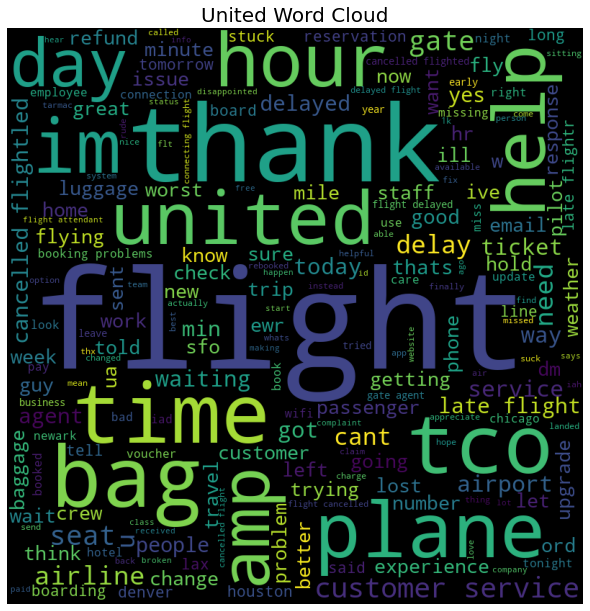

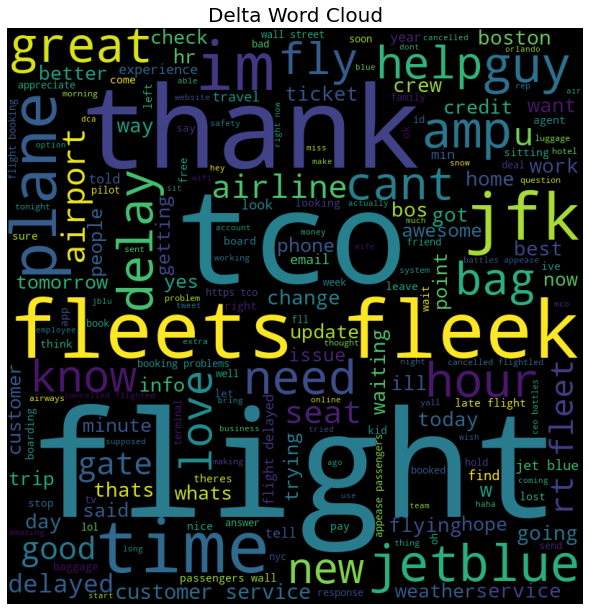

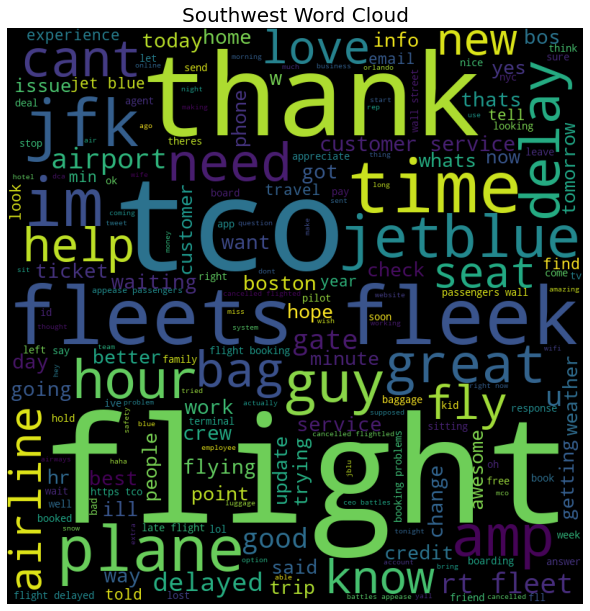

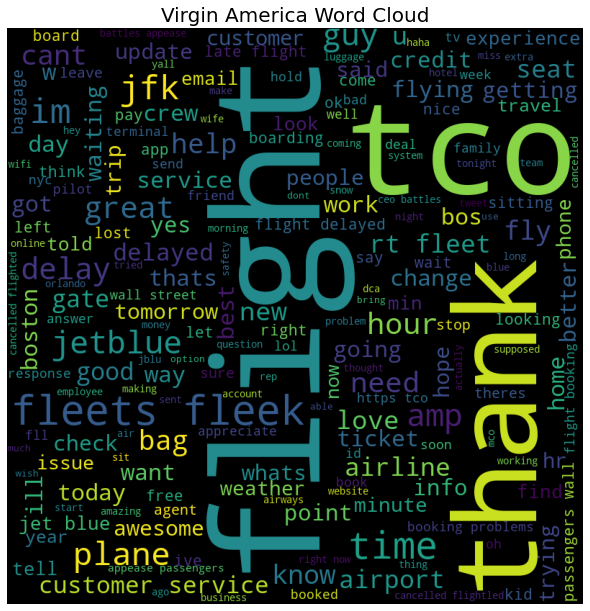

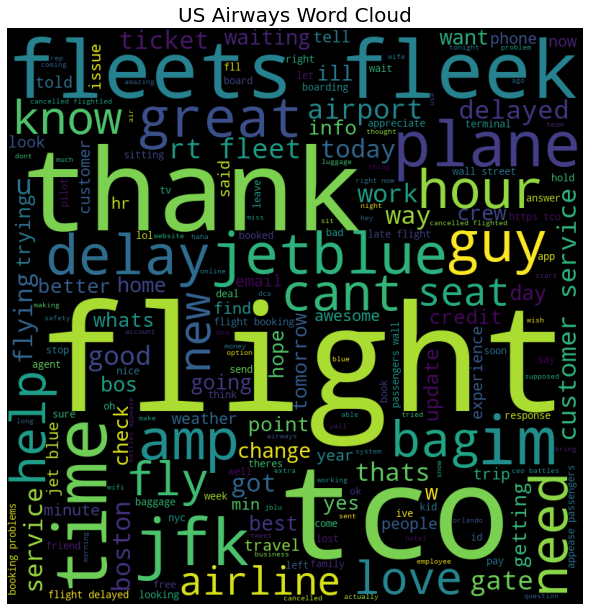

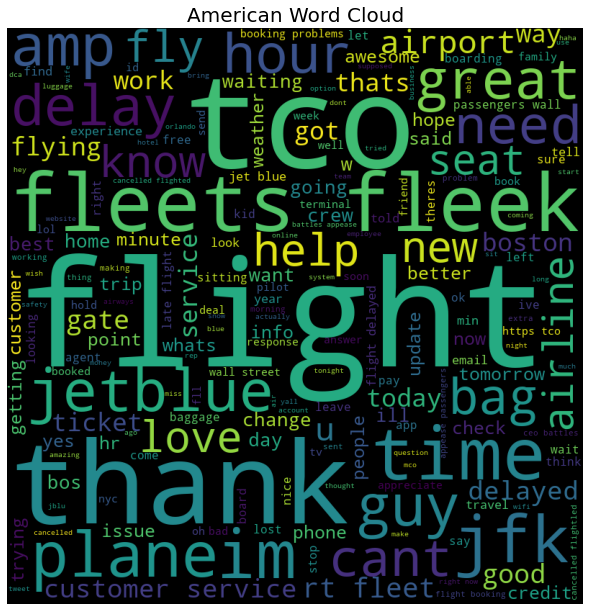

In [6]:
def generate_wordcloud(df, airline):
    text = " ".join(review for review in df["text"])
    wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.title(f"{airline} Word Cloud", fontsize=20)

    plt.show()

generate_wordcloud(United, "United")
generate_wordcloud(Delta, "Delta")
generate_wordcloud(Delta, "Southwest")
generate_wordcloud(Delta, "Virgin America")
generate_wordcloud(Delta, "US Airways")
generate_wordcloud(Delta, "American")

## Part 2 Show the Distribution of positive/neutral/negative sentiment across all airlines

<Axes: title={'center': 'Sentiment for American'}>

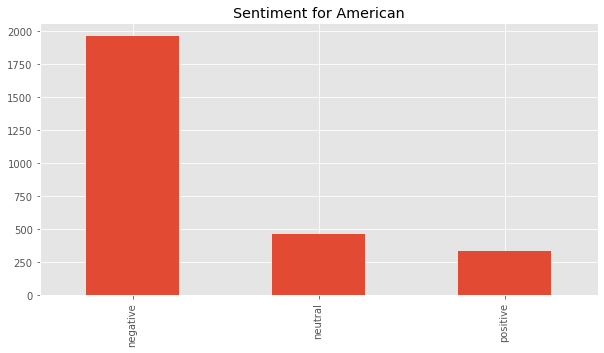

In [7]:
airlines = ['United', 'Delta', 'Southwest', 'VirginAmerica', 'USAirways', 'American']

American['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for American',
                                                figsize=(10, 5))

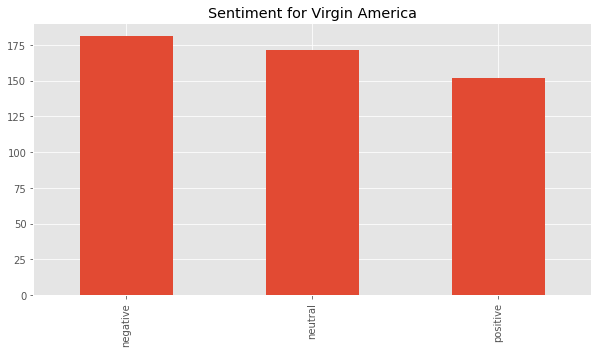

In [8]:
VirginAmerica['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for Virgin America',
                                                figsize=(10, 5))
plt.show()


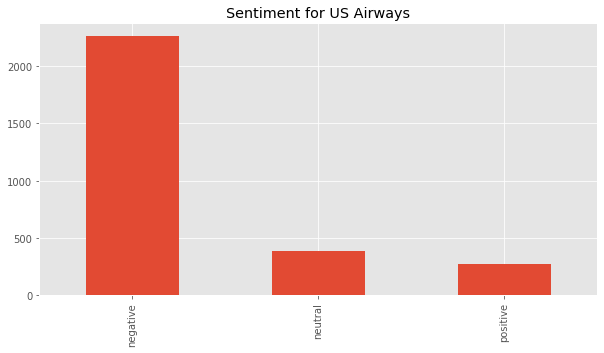

In [9]:
USAirways['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for US Airways',
                                                figsize=(10, 5))
plt.show()


<Axes: title={'center': 'Sentiment for United'}>

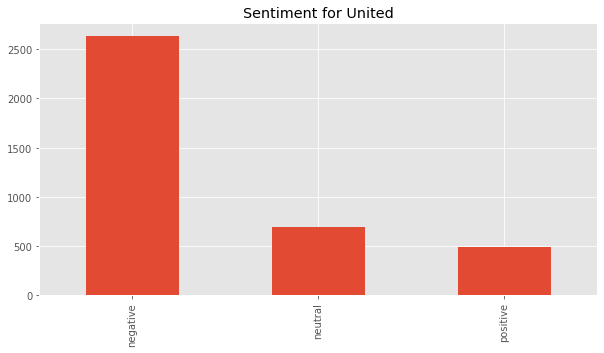

In [10]:
United['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for United',
                                                figsize=(10, 5))

<Axes: title={'center': 'Sentiment for Delta'}>

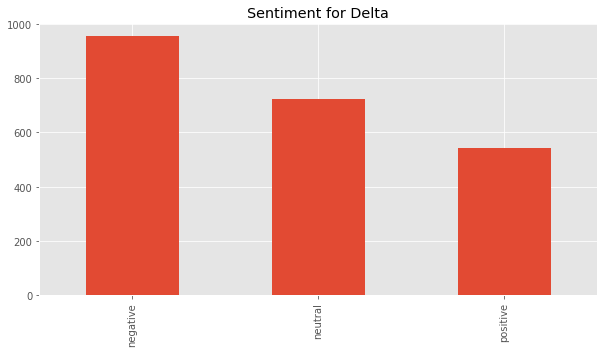

In [11]:
Delta['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for Delta',
                                                figsize=(10, 5))

<Axes: title={'center': 'Sentiment for Southwest'}>

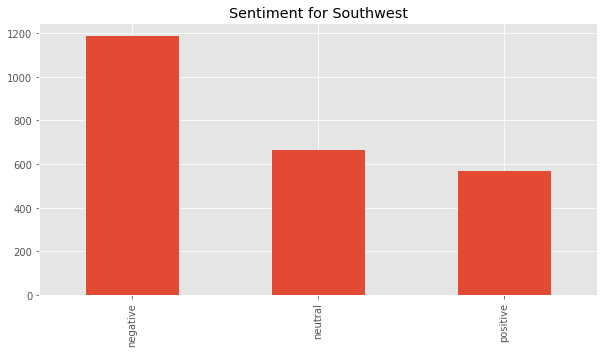

In [12]:
Southwest['airline_sentiment'].value_counts().plot(kind='bar', title=f'Sentiment for Southwest',
                                                figsize=(10, 5))

## Part 3: Use the emotion classifier build in HW2 to classify the emotions in these tweets. How are they correlated with the sentiments in Part 2?
-- Classify Emotions in these tweets using Elbow method, Logistic Regression, and Roberta pretrained model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
# make a copy 
df1 = df

In [15]:
# Define target and variables
target = df1['airline_sentiment']
text = df1['text']

In [16]:
# Vectorize and Transform
tf = TfidfVectorizer()
text = tf.fit_transform(text)

In [17]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size = .2, stratify=target)

In [18]:
# Naive Bayes 
nv = MultinomialNB()
nv.fit(X_train, y_train)

MultinomialNB()

In [19]:
nv.score(X_test, y_test)

0.6898907103825137

In [20]:
## Make a single Prediction 
sample_text = ['I Love You']

vect = tf.transform(sample_text)

nv.predict(vect)

array(['positive'], dtype='<U8')

In [21]:
# Logistic Regression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [22]:
lr.score(X_test, y_test)

0.7783469945355191

In [23]:
## Make a single Prediction 
sample_text = ['Why is he acting like a child?!']

vect = tf.transform(sample_text)

lr.predict(vect)

array(['negative'], dtype=object)

In [24]:
## Try with transformers instead of Vectorizor
from sentence_transformers import SentenceTransformer
df2 = df
df2.reset_index(inplace=True, drop=False)
df2.rename(columns={'index': 'ID'}, inplace=True)
target = df2['airline_sentiment']
text = df2['text']

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(text)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size = .2, stratify=target)

In [26]:
# Logistic Regression
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [27]:
lr.score(X_test, y_test)

0.7797131147540983

In [28]:
## Try Using Roberta PreTrained Sentiment Analyzer and Compare
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from tqdm.notebook import tqdm
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
example = 'This oatmeal tastes like shit'

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97779834, 'roberta_neu': 0.018760141, 'roberta_pos': 0.003441523}


In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [32]:
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['text']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/14640 [00:00<?, ?it/s]

In [33]:
df2

,ID,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus added commercials experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,today mean need trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,aggressive blast obnoxious entertainment gue...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank got different flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving 20 minutes late flight warnings comm...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,bring american airlines,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,money change flight answer phones suggestion...,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [34]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df2, how='left')

In [35]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'tweet_id', 'airline_sentiment',
       'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [36]:
results_df = results_df[['ID', 'airline', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'airline_sentiment', 'text']]

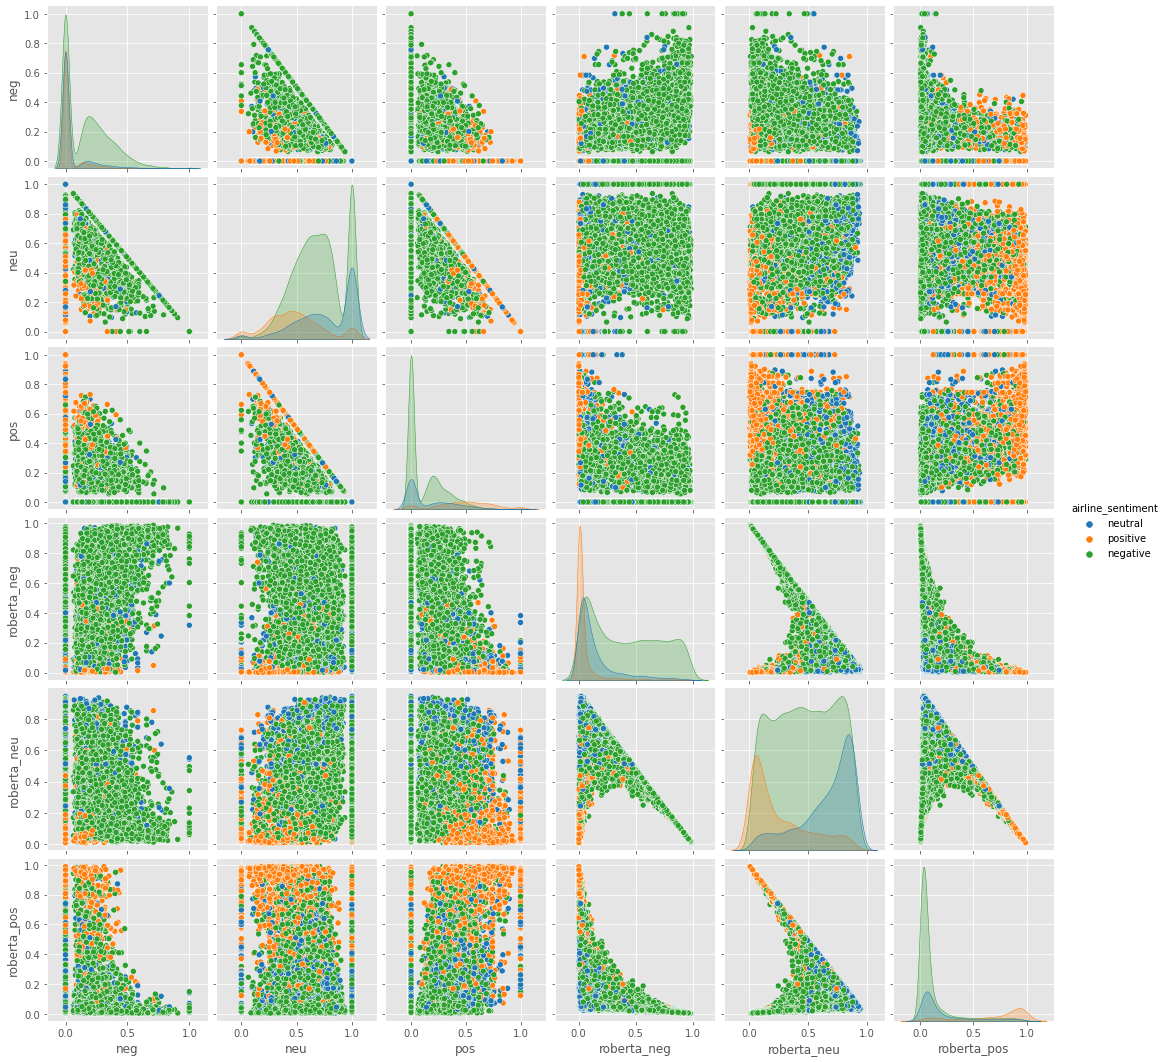

In [37]:
sns.pairplot(data=results_df, vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], 
             hue = 'airline_sentiment', palette = 'tab10')
plt.show()

In [38]:
results_df

,ID,airline,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,text
0,0,Virgin America,0.000,1.000,0.000,0.0000,0.215634,0.643773,0.140594,neutral,said
1,1,Virgin America,0.000,1.000,0.000,0.0000,0.497370,0.434796,0.067834,positive,plus added commercials experience tacky
2,2,Virgin America,0.000,1.000,0.000,0.0000,0.176005,0.726519,0.097477,neutral,today mean need trip
3,3,Virgin America,0.343,0.448,0.209,-0.2023,0.556878,0.402157,0.040965,negative,aggressive blast obnoxious entertainment gue...
4,4,Virgin America,0.636,0.364,0.000,-0.5423,0.784228,0.187802,0.027970,negative,big bad thing
...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,American,0.000,0.615,0.385,0.3612,0.088788,0.742508,0.168704,positive,thank got different flight chicago
14636,14636,American,0.293,0.707,0.000,-0.7003,0.870435,0.119604,0.009961,negative,leaving 20 minutes late flight warnings comm...
14637,14637,American,0.000,1.000,0.000,0.0000,0.148454,0.732113,0.119432,neutral,bring american airlines
14638,14638,American,0.000,0.698,0.302,0.3818,0.154424,0.786269,0.059307,negative,money change flight answer phones suggestion...


## Part 3 Classify Emotion Using HW2 

## Use Kendricks HW2 file and save Naive Bayes and TFIDF Transformation and apply to tweets 
## The HW2 file achieved a 82% correct rate
## Use pickle for this

In [39]:
results_df['text']

0                                                     said
1                  plus added commercials experience tacky
2                                     today mean need trip
3          aggressive blast obnoxious entertainment gue...
4                                            big bad thing
                               ...                        
14635                   thank got different flight chicago
14636      leaving 20 minutes late flight warnings comm...
14637                            bring american airlines  
14638      money change flight answer phones suggestion...
14639      8 ppl need 2 know seats flight plz standby 4...
Name: text, Length: 14640, dtype: object

In [40]:
# Load Saved Model 
with open('nb_tfidf.pkl', 'rb') as f:
    tfidf, mnb = pickle.load(f)
new_text = results_df['text']
X_new = tfidf.transform(new_text)

y_pred = mnb.predict(X_new)

In [41]:
results_df['emotion_classif'] = y_pred

In [42]:
results_df

,ID,airline,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,text,emotion_classif
0,0,Virgin America,0.000,1.000,0.000,0.0000,0.215634,0.643773,0.140594,neutral,said,surprise
1,1,Virgin America,0.000,1.000,0.000,0.0000,0.497370,0.434796,0.067834,positive,plus added commercials experience tacky,surprise
2,2,Virgin America,0.000,1.000,0.000,0.0000,0.176005,0.726519,0.097477,neutral,today mean need trip,enthusiasm
3,3,Virgin America,0.343,0.448,0.209,-0.2023,0.556878,0.402157,0.040965,negative,aggressive blast obnoxious entertainment gue...,happiness
4,4,Virgin America,0.636,0.364,0.000,-0.5423,0.784228,0.187802,0.027970,negative,big bad thing,hate
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,American,0.000,0.615,0.385,0.3612,0.088788,0.742508,0.168704,positive,thank got different flight chicago,relief
14636,14636,American,0.293,0.707,0.000,-0.7003,0.870435,0.119604,0.009961,negative,leaving 20 minutes late flight warnings comm...,hate
14637,14637,American,0.000,1.000,0.000,0.0000,0.148454,0.732113,0.119432,neutral,bring american airlines,hate
14638,14638,American,0.000,0.698,0.302,0.3818,0.154424,0.786269,0.059307,negative,money change flight answer phones suggestion...,neutral


In [43]:
## Show Correlation 
pivot_df = pd.pivot_table(results_df, values='compound', index = 'airline', columns = 'emotion_classif', aggfunc='mean')

In [44]:
pivot_df

emotion_classif,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
airline,,,,,,,,,,,,,
American,0.001739,-0.078463,0.052180,0.105560,0.196665,0.380799,-0.161656,0.390599,0.064892,0.168747,-0.190373,0.057656,-0.074509
Delta,0.021487,-0.069410,0.085997,0.186919,0.188911,0.435285,-0.080889,0.481725,0.120213,0.249633,-0.117149,0.118539,-0.084334
Southwest,0.107431,-0.035571,0.204823,0.176258,0.261675,0.437142,-0.143508,0.497063,0.155041,0.252024,-0.112060,0.085922,-0.104713
US Airways,0.057097,-0.081779,0.032946,0.086819,0.216753,0.392250,-0.203786,0.355665,0.098751,0.170020,-0.199409,-0.000589,-0.105778
United,0.071910,-0.051374,0.100032,0.106907,0.105403,0.380517,-0.191949,0.446506,0.140102,0.242057,-0.158681,0.062163,-0.083756
Virgin America,-0.041017,-0.017220,0.150339,0.117454,0.346467,0.369936,-0.014260,0.528377,0.069858,0.292708,0.087176,0.122177,-0.102847


C:\Users\Julian Sotelo\anaconda3\lib\site-packages\seaborn\matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


<Axes: xlabel='emotion_classif', ylabel='airline'>

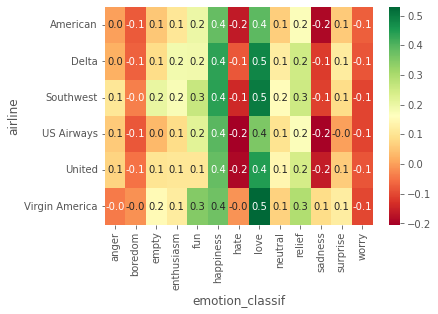

In [81]:
# Create a heat map to visualize the data
sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, fmt='.1f')

In [82]:
# save the df 
results_df.to_csv('airlines_tweets.csv', index = False)

In [136]:
#!pip install --upgrade gensim
#!pip install pyldavis
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import preprocess_string

In [84]:
results_df.head()

,ID,airline,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,text,emotion_classif,cleaned_text,assigned_topic_id,assigned_topic_score
0,0,Virgin America,0.000,1.000,0.000,0.0000,0.215634,0.643773,0.140594,neutral,said,surprise,[said],1,0.474473
1,1,Virgin America,0.000,1.000,0.000,0.0000,0.497370,0.434796,0.067834,positive,plus added commercials experience tacky,surprise,"[plu, ad, commerci, experi, tacki]",5,0.474257
2,2,Virgin America,0.000,1.000,0.000,0.0000,0.176005,0.726519,0.097477,neutral,today mean need trip,enthusiasm,"[todai, mean, need, trip]",1,0.401895
3,3,Virgin America,0.343,0.448,0.209,-0.2023,0.556878,0.402157,0.040965,negative,aggressive blast obnoxious entertainment gue...,happiness,"[aggress, blast, obnoxi, entertain, guest, fac...",2,0.519055
4,4,Virgin America,0.636,0.364,0.000,-0.5423,0.784228,0.187802,0.027970,negative,big bad thing,hate,"[big, bad, thing]",1,0.407547


## Part 4: What topics are people talking about in their tweets? How does this distribution of topics differ across airlines? 

In [85]:
#clean text, wouldnt let me run without this, before the text was just one string
#could possible split it into just strings instead of procescing text not sure best way to go
#about this still thinking for now lol
def preprocess_text(text):
    return preprocess_string(text)

results_df['cleaned_text'] = results_df['text'].apply(preprocess_text)






In [138]:
#need to create our dictionary and bow corpus to prepare model for LDA
texts = results_df['cleaned_text']
dic = corpora.Dictionary(texts)
corpus = [dic.doc2bow(doc) for doc in results_df['cleaned_text']]

In [ ]:
## find optimal # of topics
## Takes awhile to run
coherence_scores = []
num_topics_range = range(2, 10)  # Check for number of topics from 2 to 20

for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dic, num_topics=num_topics, passes=10, alpha='auto', per_word_topics=True, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dic, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(num_topics_range, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores vs. Number of Topics')
plt.show()

# Find the optimal number of topics
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_num_topics}")

In [140]:
#lda model parameters here, could modify these, for now i think 12 is ok
lda_model = LdaModel(corpus=corpus,
                     id2word=dic,
                     num_topics=6,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

In [141]:
#print topics and the words in each
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.049*"plane" + 0.035*"gate" + 0.022*"wait" + 0.020*"board" + 0.019*"sit" + 0.017*"crew" + 0.014*"agent" + 0.014*"passeng" + 0.012*"hour" + 0.009*"seat"
Topic: 1 
Words: 0.092*"flight" + 0.024*"cancel" + 0.019*"help" + 0.014*"delai" + 0.014*"time" + 0.013*"hour" + 0.013*"need" + 0.012*"flightl" + 0.011*"amp" + 0.010*"dai"
Topic: 2 
Words: 0.072*"thank" + 0.039*"servic" + 0.037*"hold" + 0.036*"custom" + 0.027*"wait" + 0.024*"phone" + 0.020*"hour" + 0.015*"minut" + 0.014*"respons" + 0.013*"line"
Topic: 3 
Words: 0.037*"dfw" + 0.014*"credit" + 0.012*"extra" + 0.012*"fleet" + 0.010*"inform" + 0.009*"disconnect" + 0.009*"card" + 0.009*"seat" + 0.008*"high" + 0.008*"live"
Topic: 4 
Words: 0.031*"servic" + 0.030*"custom" + 0.022*"worst" + 0.019*"experi" + 0.016*"bad" + 0.013*"airlin" + 0.011*"mile" + 0.010*"us" + 0.010*"poor" + 0.009*"make"
Topic: 5 
Words: 0.108*"tco" + 0.108*"http" + 0.016*"american" + 0.012*"right" + 0.011*"airwai" + 0.011*"fleek" + 0.007*"tuesdai" + 0.006

In [142]:
import pyLDAvis.gensim_models

#create the LDA viz, save it, display it, etc
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dic)
pyLDAvis.save_html(vis, 'lda_topics.html')
pyLDAvis.display(vis)

C:\Users\Julian Sotelo\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [90]:
## 

In [143]:
#empty topic list to add from using a loop
assigned_topics = []

#assign topics to each row
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    top_topic = sorted(doc_topics, key=lambda x: x[1], reverse=True)[0]
    assigned_topics.append((top_topic[0], top_topic[1]))

#add the assigned topics and scores to the results_df dataframe
results_df['assigned_topic_id'] = [t[0] for t in assigned_topics]
results_df['assigned_topic_score'] = [t[1] for t in assigned_topics]

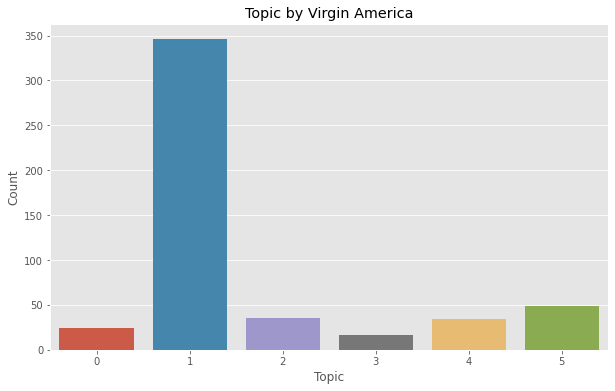

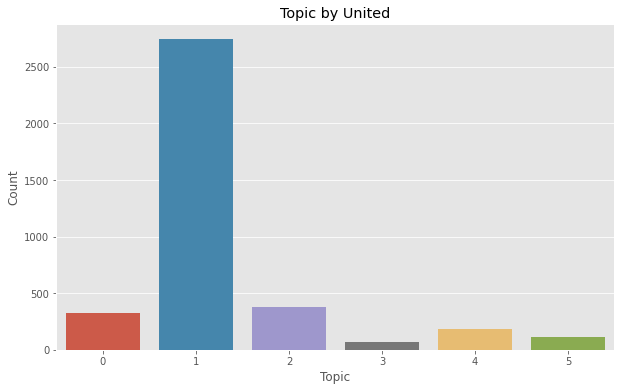

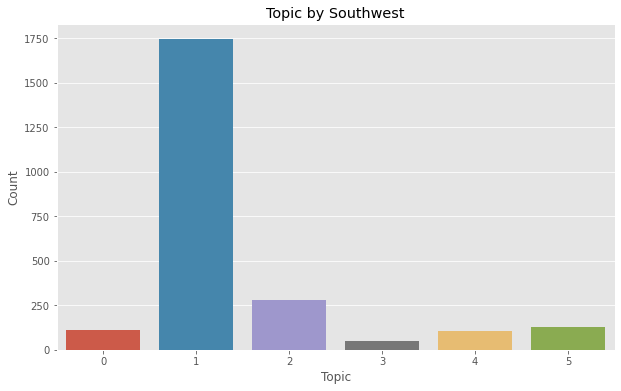

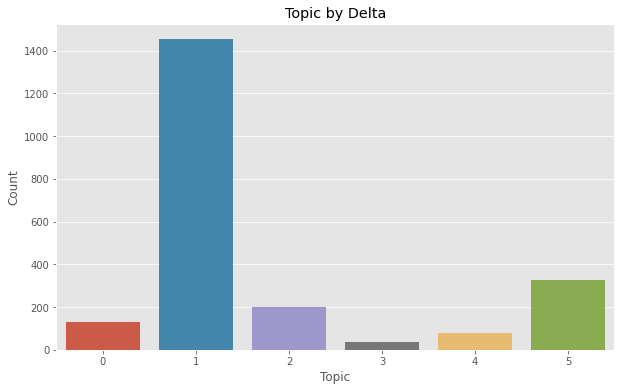

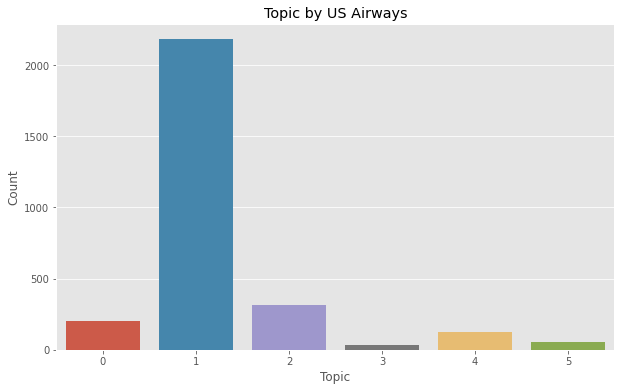

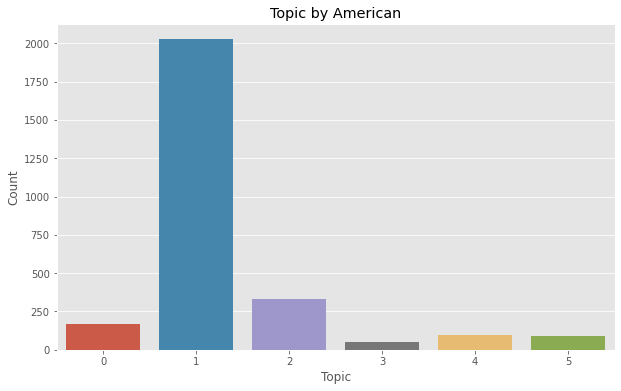

In [144]:
#group results df
grouped_results = results_df.groupby(['airline', 'assigned_topic_id']).size().reset_index(name='count')

#barplot for topics by airline use for loop to create sep graphs for each airline
for airline in results_df['airline'].unique():
    airline_df = grouped_results[grouped_results['airline']==airline]
    plt.figure(figsize=(10,6))
    sns.barplot(x='assigned_topic_id', y='count', data=airline_df)
    plt.title(f"Topic by {airline}")
    plt.xlabel("Topic")
    plt.ylabel("Count")
    plt.show()

## Part 5: Plot a heat map that shows the sentiment associated with the airlines for different topics. 

C:\Users\Julian Sotelo\anaconda3\lib\site-packages\seaborn\matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


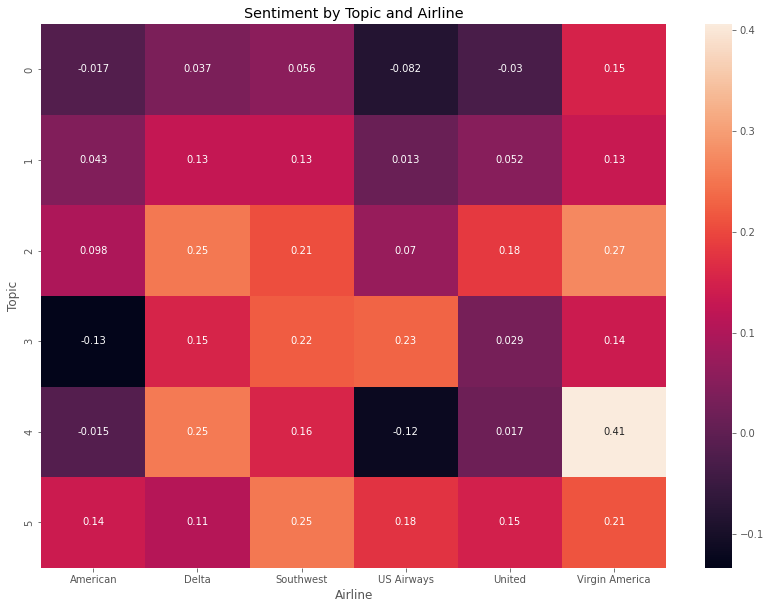

In [145]:
#need to create pivot table to use for our heatmap
pivot_table = pd.pivot_table(results_df, values='compound', index='assigned_topic_id', columns='airline', aggfunc=np.mean)

#heatmap
plt.figure(figsize=(14,10))
sns.heatmap(pivot_table, cmap='rocket', annot=True)
plt.title('Sentiment by Topic and Airline')
plt.xlabel('Airline')
plt.ylabel('Topic')
plt.show()

In [146]:
results_df

,ID,airline,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,airline_sentiment,text,emotion_classif,cleaned_text,assigned_topic_id,assigned_topic_score
0,0,Virgin America,0.000,1.000,0.000,0.0000,0.215634,0.643773,0.140594,neutral,said,surprise,[said],1,0.615950
1,1,Virgin America,0.000,1.000,0.000,0.0000,0.497370,0.434796,0.067834,positive,plus added commercials experience tacky,surprise,"[plu, ad, commerci, experi, tacki]",1,0.421221
2,2,Virgin America,0.000,1.000,0.000,0.0000,0.176005,0.726519,0.097477,neutral,today mean need trip,enthusiasm,"[todai, mean, need, trip]",1,0.785376
3,3,Virgin America,0.343,0.448,0.209,-0.2023,0.556878,0.402157,0.040965,negative,aggressive blast obnoxious entertainment gue...,happiness,"[aggress, blast, obnoxi, entertain, guest, fac...",1,0.667314
4,4,Virgin America,0.636,0.364,0.000,-0.5423,0.784228,0.187802,0.027970,negative,big bad thing,hate,"[big, bad, thing]",1,0.533944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,14635,American,0.000,0.615,0.385,0.3612,0.088788,0.742508,0.168704,positive,thank got different flight chicago,relief,"[thank, got, differ, flight, chicago]",1,0.699315
14636,14636,American,0.293,0.707,0.000,-0.7003,0.870435,0.119604,0.009961,negative,leaving 20 minutes late flight warnings comm...,hate,"[leav, minut, late, flight, warn, commun, minu...",1,0.434995
14637,14637,American,0.000,1.000,0.000,0.0000,0.148454,0.732113,0.119432,neutral,bring american airlines,hate,"[bring, american, airlin]",1,0.391141
14638,14638,American,0.000,0.698,0.302,0.3818,0.154424,0.786269,0.059307,negative,money change flight answer phones suggestion...,neutral,"[monei, chang, flight, answer, phone, suggest,...",1,0.465244


## Part 6: Pick Southwest and United. Show how these airlines differ based on the emotions consumers express about them in the tweets.

In [147]:
temp_df = results_df.loc[results_df.airline.isin(['Southwest', 'United'])]

In [148]:
united_df = pd.pivot_table(temp_df.loc[temp_df.airline.isin(['United'])], values = 'compound', index = 'assigned_topic_id', aggfunc='mean')
southwest_df = pd.pivot_table(temp_df.loc[temp_df.airline.isin(['Southwest'])], values = 'compound', index = 'assigned_topic_id', aggfunc='mean')
pivot_table = pd.concat([southwest_df, united_df], axis=1, keys=['Southwest', 'United'])

C:\Users\Julian Sotelo\anaconda3\lib\site-packages\seaborn\matrix.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.cmap = mpl.cm.get_cmap(cmap)


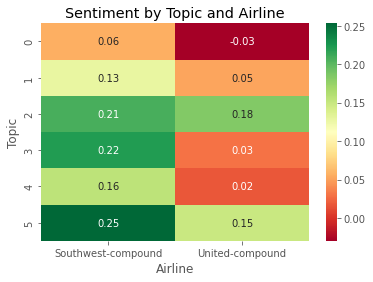

In [149]:
# Create a heat map to visualize the data
sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt='.2f')
plt.title('Sentiment by Topic and Airline')
plt.xlabel('Airline')
plt.ylabel('Topic')
plt.show()

C:\Users\Julian Sotelo\AppData\Local\Temp\ipykernel_15412\163537792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = temp_df.groupby(['airline', 'emotion_classif']).mean()['compound'].reset_index()
C:\Users\Julian Sotelo\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Julian Sotelo\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


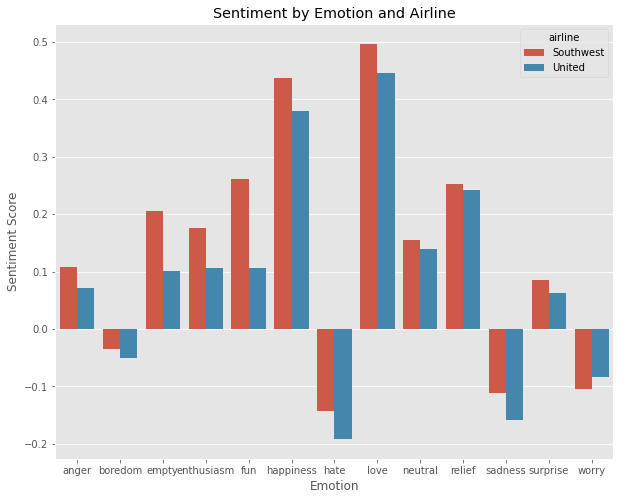

In [150]:
means_df = temp_df.groupby(['airline', 'emotion_classif']).mean()['compound'].reset_index()
# SHow viz
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=means_df, x='emotion_classif', y='compound', hue='airline', ax=ax)
ax.set_title('Sentiment by Emotion and Airline')
ax.set_xlabel('Emotion')
ax.set_ylabel('Sentiment Score')
plt.show()

## Part 7: Pick two topics (dimensions) and create a perception map of how all the airlines are located on the two-dimensional map. The axes go from -1 to 1, where 1 denotes that all the tweets pertinent to an airline about that topic are positive, whereas -1 denotes that all tweets are negative

In [109]:
## Lets Pick topic 8 and topic 7
#topics = results_df.loc[results_df['assigned_topic_id'].isin([7, 8])]

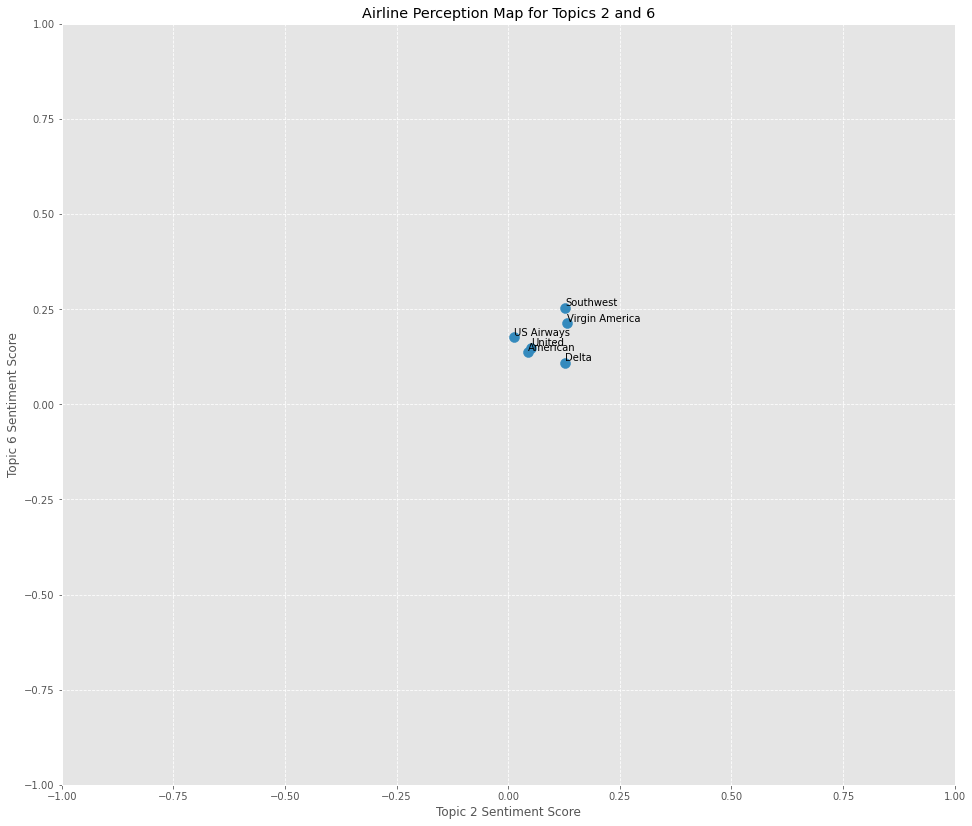

In [156]:
# Filtering the dataframe
filtered_df = results_df[(results_df['assigned_topic_id'] == 1) | (results_df['assigned_topic_id'] == 5)]

# Compute average compound sentiment score for each airline-topic combination
average_sentiment = filtered_df.groupby(['airline', 'assigned_topic_id'])['compound'].mean().reset_index()

# Normalize sentiment scores to a range of -1 to 1
average_sentiment['normalized_sentiment'] = average_sentiment['compound'].apply(lambda x: max(min(x, 1), -1))

# Pivot the dataframe to have topics as columns
pivoted_df = average_sentiment.pivot_table(index='airline', columns='assigned_topic_id', values='normalized_sentiment').reset_index()

# Plot the perception map
fig, ax = plt.subplots(figsize = (16,14))
pivoted_df.plot.scatter(x=1, y=5, ax=ax, s=100, xlim=(-1, 1), ylim=(-1, 1))

# Label the points with the airline names
for i, row in pivoted_df.iterrows():
    ax.text(row[1], row[5], row['airline'], fontsize=10, horizontalalignment='left', verticalalignment='bottom')

ax.set_xlabel('Topic 2 Sentiment Score')
ax.set_ylabel('Topic 6 Sentiment Score')
ax.set_title('Airline Perception Map for Topics 2 and 6')
ax.grid(True, linestyle='--')
plt.show()

### Topic 2 - seems to deal with service overall positive
### Topic 6 - Seems to deal with credit card miles overall positive